Dataset with Multiple Features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
# data = {
#     "experience_years": [1,2,3,4,5,6,7,8,9,10],
#     "projects_completed": [1,2,2,3,4,5,6,7,8,9],
#     "salary": [32000,37000,42000,47000,52000,57000,62000,67000,72000,77000]
# }


data = {
    "experience_years": [1,2,3,4,5,6,7,8,9,10],
    "projects_completed": [1,3,2,5,4,6,5,9,7,8],
    "salary": [30000,38000,41000,46000,54000,56000,63000,65000,70000,78000]
}


df = pd.DataFrame(data)
df


,experience_years,projects_completed,salary
0,1,1,30000
1,2,3,38000
2,3,2,41000
3,4,5,46000
4,5,4,54000
5,6,6,56000
6,7,5,63000
7,8,9,65000
8,9,7,70000
9,10,8,78000


In [10]:
X = df[["experience_years", "projects_completed"]]
y = df["salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaller = StandardScaler()
X_train_scaled = scaller.fit_transform(X_train)
X_test_scaled = scaller.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

In [13]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rsme = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rsme)
print("R²:", r2)

MAE: 3143.4108527131866
MSE: 9896656.788955044
RMSE: 3145.8952285406845
R²: 0.9613411844181443


experience_years : 13462.912017836266
projects_completed : -2.156084082292025e-12


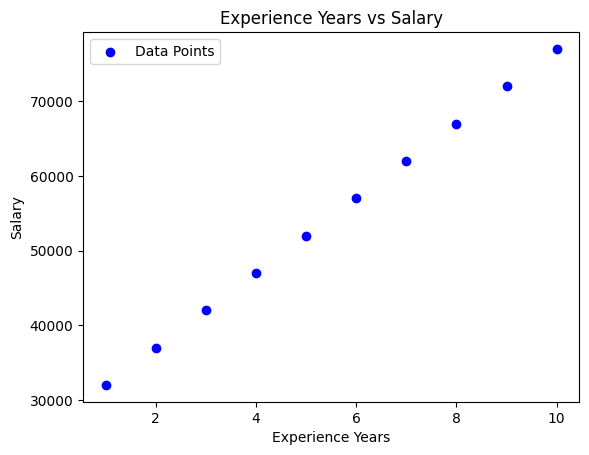

In [8]:
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)
plt.scatter(X["experience_years"], y, color='blue', label='Data Points')
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.title("Experience Years vs Salary")
plt.legend()
plt.show()